In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
!ls drive/My\ Drive/ML\ Project/data/
!pip install git+git://github.com/rasbt/mlxtend.git

project3_dataset1.txt  project3_dataset2.txt
  Cloning git://github.com/rasbt/mlxtend.git to /tmp/pip-req-build-xdntxpjf
  Running command git clone -q git://github.com/rasbt/mlxtend.git /tmp/pip-req-build-xdntxpjf
  Created wheel for mlxtend: filename=mlxtend-0.18.0-py2.py3-none-any.whl size=1588831 sha256=c75e2480b1fa16c2bcd4e6f546a16b726cad44f7991ebfba77c1fe8b88d85839
  Stored in directory: /tmp/pip-ephem-wheel-cache-cd8aeph0/wheels/85/e4/4c/ee71547ac9ea223b07fe8f55b0e5f71536a6a34ae3480205f3
Successfully built mlxtend
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


# project dataset 1

In [ ]:
# pre-processing data
import_path = 'drive/My Drive/ML Project/data/project3_dataset1.txt'
dataset_1 = pd.read_csv(import_path, sep="\t", header=None)
dataset_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.024230,0.039500,0.016780,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637,1
1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.036720,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.52490,0.53550,0.17410,0.3985,0.12440,1
2,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.05588,0.2595,0.06233,0.4866,1.9050,2.877,34.68,0.015740,0.082620,0.080990,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.1028,0.18430,0.15460,0.09314,0.2955,0.07009,0
3,11.43,15.39,73.06,399.8,0.09639,0.06889,0.03503,0.02875,0.1734,0.05865,0.1759,0.9938,1.143,12.67,0.005133,0.015210,0.014340,0.008602,0.01501,0.001588,12.32,22.02,79.93,462.0,0.1190,0.16480,0.13990,0.08476,0.2676,0.06765,0
4,14.61,15.69,92.68,664.9,0.07618,0.03515,0.01447,0.01877,0.1632,0.05255,0.3160,0.9115,1.954,28.90,0.005031,0.006021,0.005325,0.006324,0.01494,0.000895,16.46,21.75,103.70,840.8,0.1011,0.07087,0.04746,0.05813,0.2530,0.05695,0


In [ ]:
dataset1_features = dataset_1.drop([30], axis = 1) # and drop whatever other featuers you dont want to use in your algorithm
dataset1_labels = dataset_1[30].copy()

In [ ]:
dataset1_labels

0      1
1      1
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    0
Name: 30, Length: 569, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp
from sklearn import metrics
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(dataset1_features, dataset1_labels, test_size=0.20)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train = num_pipeline.fit_transform(X_train)
X_test = num_pipeline.fit_transform(X_test)

# Building preliminary random forest classifier

Train Accuracy: 1.0
Test Accuracy: 0.9298245614035088
[[71  7]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95        78
           1       0.83      0.97      0.90        36

    accuracy                           0.93       114
   macro avg       0.91      0.94      0.92       114
weighted avg       0.94      0.93      0.93       114



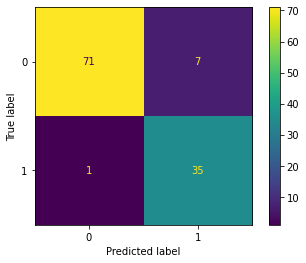

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Train Accuracy:", classifier.score(X_train, y_train))
print("Test Accuracy:", classifier.score(X_test, y_test))

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(classifier, X_test, y_test)

# Grid Search CV

In [ ]:
# GridSearchCV

n_estimators = [int(x) for x in np.linspace(start =5, stop = 100, num=25)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

print(param_grid)

{'n_estimators': [5, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = 4)

In [ ]:
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  34 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 276 tasks      | elapsed:   17.6s
[Parallel(n_jobs=4)]: Done 682 tasks      | elapsed:   41.3s
[Parallel(n_jobs=4)]: Done 1248 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 1978 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 2868 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 3922 tasks      | elapsed:  4.2min
[Parallel(n_jobs=4)]: Done 5136 tasks      | elapsed:  5.3min
[Parallel(n_jobs=4)]: Done 6514 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 8000 out of 8000 | elapsed:  8.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None...
                                              warm_start=False),
             iid='deprecated', n_jobs=4,
     

In [ ]:
rf_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 16}

# Dataset 1 results

[[70  8]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        78
           1       0.81      0.94      0.87        36

    accuracy                           0.91       114
   macro avg       0.89      0.92      0.90       114
weighted avg       0.92      0.91      0.91       114



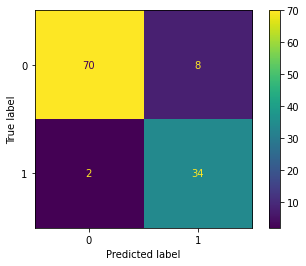

In [ ]:
from sklearn.model_selection import cross_val_score


y_pred = rf_grid.predict(X_test)

#scores = cross_val_score(rf_grid, X_train, y_train, cv=10, verbose=2, n_jobs=4)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(rf_grid, X_test, y_test)



In [ ]:
classifier = RandomForestClassifier()
classifier.set_params(**rf_grid.best_params_)

scores = cross_val_score(classifier, X_train, y_train, cv=3, verbose=2, n_jobs=4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

fpr, tpr, thresholds = metrics.roc_curve(y_test+1, y_pred, pos_label=2)
print(f"AUC: {metrics.auc(fpr, tpr)}")

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.95 (+/- 0.02)
AUC: 0.9209401709401709
Precision: 0.8095238095238095
Recall: 0.9444444444444444


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.1s finished


# Testing Random Search CV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_random_grid = RandomizedSearchCV(estimator = classifier, param_distributions = param_grid, cv = 10, verbose = 2, n_jobs = 4)


In [ ]:
rf_random_grid.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done  93 out of 100 | elapsed:    5.1s remaining:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    5.4s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=4,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=5,
                                                    min_weight_fraction_leaf=0.0,
                

In [ ]:
rf_random_grid.best_params_

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 68}

[[70  8]
 [ 1 35]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        78
           1       0.81      0.97      0.89        36

    accuracy                           0.92       114
   macro avg       0.90      0.93      0.91       114
weighted avg       0.93      0.92      0.92       114



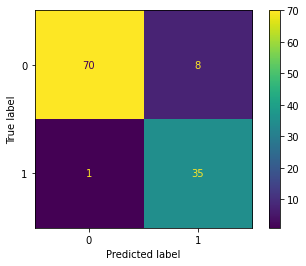

In [ ]:
y_pred = rf_random_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(rf_random_grid, X_test, y_test)

# Bias-Variance Tradeoff

Dataset 1:


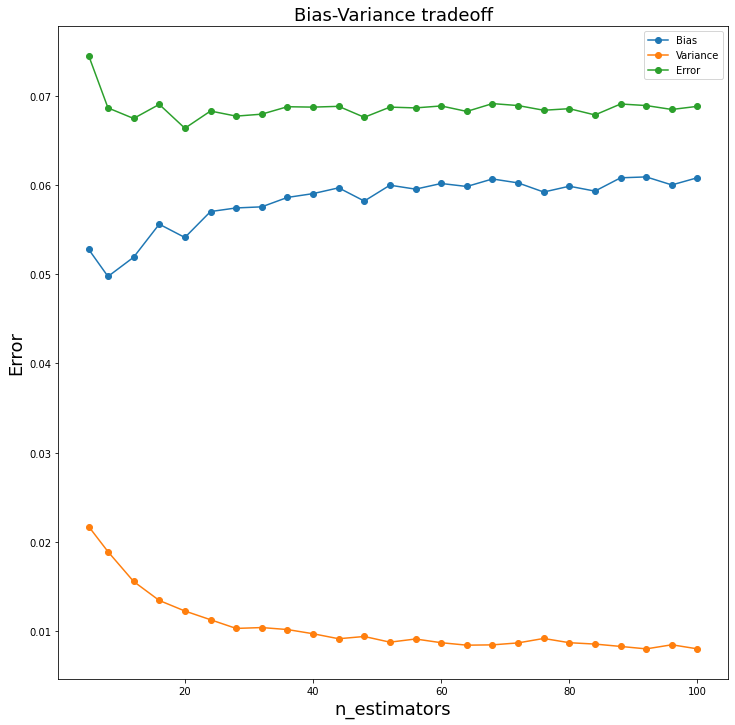

In [ ]:
n_estimators = param_grid['n_estimators']

def plot_bias_var_tradeoff(parameters, bias, variance, err):
  plt.figure(figsize=(12,12))
  plt.plot(parameters, bias, marker='o')
  plt.plot(parameters, variance, marker='o',)
  plt.plot(parameters, err, marker='o',)
  plt.legend(["Bias", "Variance", "Error"])
  plt.title('Bias-Variance tradeoff', fontsize=18)
  plt.xlabel('n_estimators', fontsize=18)
  plt.ylabel('Error', fontsize=18)




print('Dataset 1:')
bias_1 = []
var_1 = []
err_1 = []
for estimators in n_estimators:
  classifier = RandomForestClassifier(n_estimators=estimators)
  classifier.fit(X_train, y_train)
  mse, bias, var = bias_variance_decomp(classifier, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_1.append(bias)
  var_1.append(var)
  err_1.append(mse)

# plot
plot_bias_var_tradeoff(n_estimators, bias_1, var_1, err_1)


# https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/
# https://www.machinecurve.com/index.php/2020/11/02/machine-learning-error-bias-variance-and-irreducible-error-with-python/#bias-error
# http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.evaluate/#bias_variance_decomp

# project dataset 2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


import_path = 'drive/My Drive/ML Project/data/project3_dataset2.txt'
dataset_2 = pd.read_csv(import_path, sep="\t", header=None)
dataset_2.head()

temp = dataset_2.loc[dataset_2[4] != 'Present']
#print(len(temp))


dataset_2 = dataset_2.replace('Present', 1)
dataset_2 = dataset_2.replace('Absent', 0)


dataset2_features = dataset_2.drop([9], axis = 1) # and drop whatever other featuers you dont want to use in your algorithm
dataset2_labels = dataset_2[9].copy()



X_train, X_test, y_train, y_test = train_test_split(dataset2_features, dataset2_labels, test_size=0.20)

from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])


X_train = num_pipeline.fit_transform(X_train)
X_test = num_pipeline.fit_transform(X_test)




# Building preliminary random forest classifier

[[51 10]
 [19 13]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        61
           1       0.57      0.41      0.47        32

    accuracy                           0.69        93
   macro avg       0.65      0.62      0.63        93
weighted avg       0.67      0.69      0.67        93



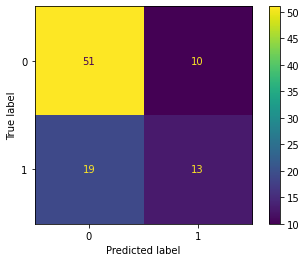

In [ ]:

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(classifier, X_test, y_test)

In [ ]:
print("Train Accuracy:", classifier.score(X_train, y_train))
print("Test Accuracy:", classifier.score(X_test, y_test))

Train Accuracy: 1.0
Test Accuracy: 0.6881720430107527


# Grid Search CV

In [ ]:
# GridSearchCV

n_estimators = [int(x) for x in np.linspace(start =10, stop = 100, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

print(param_grid)


{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_grid = GridSearchCV(estimator = classifier, param_grid = param_grid, cv = 10, verbose = 2, n_jobs = 4)

In [ ]:
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   10.0s
[Parallel(n_jobs=4)]: Done 390 tasks      | elapsed:   25.2s
[Parallel(n_jobs=4)]: Done 956 tasks      | elapsed:   58.1s
[Parallel(n_jobs=4)]: Done 1686 tasks      | elapsed:  1.7min
[Parallel(n_jobs=4)]: Done 2576 tasks      | elapsed:  2.4min
[Parallel(n_jobs=4)]: Done 3200 out of 3200 | elapsed:  3.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [ ]:
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 40}

In [ ]:
classifier = RandomForestClassifier()
classifier.set_params(**rf_grid.best_params_)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Dataset 2 results

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[[55  6]
 [23  9]]
              precision    recall  f1-score   support

           0       0.71      0.90      0.79        61
           1       0.60      0.28      0.38        32

    accuracy                           0.69        93
   macro avg       0.65      0.59      0.59        93
weighted avg       0.67      0.69      0.65        93

Accuracy: 0.71 (+/- 0.02)
AUC: 0.5914446721311475
Precision: 0.6
Recall: 0.28125


[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:    0.1s finished


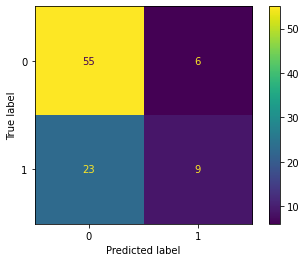

In [ ]:

y_pred = rf_grid.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

plot_confusion_matrix(rf_grid, X_test, y_test)


scores = cross_val_score(classifier, X_train, y_train, cv=3, verbose=2, n_jobs=4)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

fpr, tpr, thresholds = metrics.roc_curve(y_test+1, y_pred, pos_label=2)
print(f"AUC: {metrics.auc(fpr, tpr)}")

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Bias-variance tradeoff

Dataset 2:


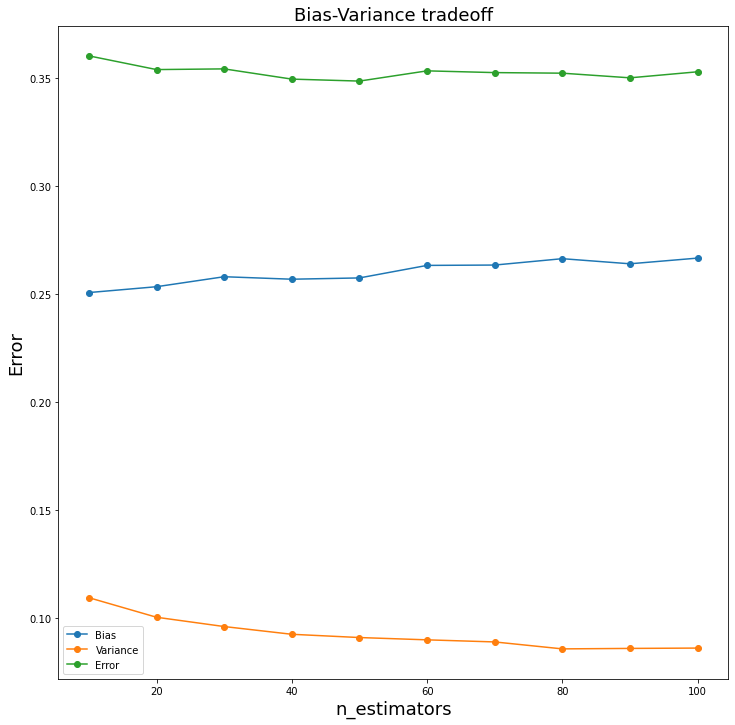

In [ ]:
n_estimators = param_grid['n_estimators']

def plot_bias_var_tradeoff(parameters, bias, variance, err):
  plt.figure(figsize=(12,12))
  plt.plot(parameters, bias, marker='o')
  plt.plot(parameters, variance, marker='o',)
  plt.plot(parameters, err, marker='o',)
  plt.legend(["Bias", "Variance", "Error"])
  plt.title('Bias-Variance tradeoff', fontsize=18)
  plt.xlabel('n_estimators', fontsize=18)
  plt.ylabel('Error', fontsize=18)




print('Dataset 2:')
bias_2 = []
var_2 = []
err_2 = []
for estimators in n_estimators:
  classifier = RandomForestClassifier(n_estimators=estimators)
  classifier.fit(X_train, y_train)
  mse, bias, var = bias_variance_decomp(classifier, np.array(X_train), np.array(y_train), np.array(X_test), np.array(y_test), loss='mse', num_rounds=200, random_seed=1)
  # Calculate matrices
  bias_2.append(bias)
  var_2.append(var)
  err_2.append(mse)


plot_bias_var_tradeoff(n_estimators, bias_2, var_2, err_2)

